# Iris Dataset : Visualization and Clustering using KMeans
This notebook explores the Iris dataset that is available in the [UCI Machine Learning](http://archive.ics.uci.edu/ml/index.php) Repository. It is also available in [Kaggle](https://www.kaggle.com/uciml/iris). This dataset contains Sepal and Petal measurements of 3 species of flowers.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Import the dataset. Update the path with the correst path to the data file.
df_iris = pd.read_csv("/content/drive/My Drive/Data Science/Data_Sets/Iris/Iris.csv")

In [3]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The dataset contains measurements of 3 species : { Iris-setosa, Iris-versicolor, Iris:virginica}. Each species contains 50 samples. There are four columns : Sepal length and width, Petal length and width (in cm).


## Data Visualization

### Box plot:
A Box-plot shows information about the quartiles of the data. For each dataset, a box-plot shows the Minimum vaue, quartiles Q1, Q2 (Median value), Q3 and Maximum value with the help of the bars. The solid box denotes the inter-quartile range Q3-Q1 and 50% of all data lie within this range. If the median is at the center of the box, eg. for the case of the Sepal length for the Iris-versicolor species, then the distribution is Gaussian. On the other hand, for negatively or positively skewed distributions, the median is located nearer to the Q1 and Q3 respectively. Posibe outliers are represented by separate points outside the range.

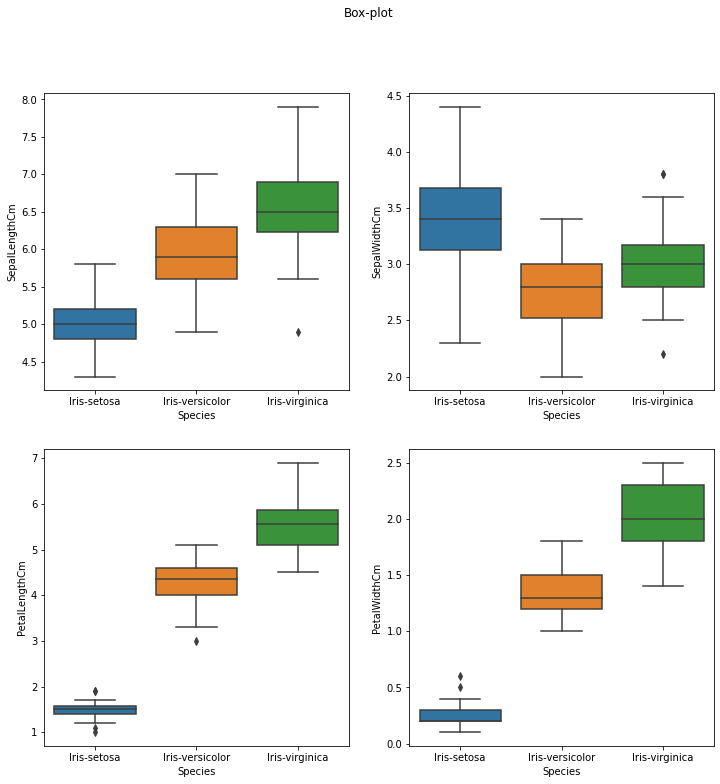

In [4]:
plt.figure(figsize=(12,12))
plt.suptitle("Box-plot")

plt.subplot(221)
sns.boxplot(x = 'Species', y = 'SepalLengthCm', data = df_iris)

plt.subplot(222)
sns.boxplot(x = 'Species', y = 'SepalWidthCm', data = df_iris)

plt.subplot(223)
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = df_iris)

plt.subplot(224)
sns.boxplot(x = 'Species', y = 'PetalWidthCm', data = df_iris)


### Violin Plot:
A violin plot provides a more informative representation as it also plots the distribution of the data points in addition to the information already provided by the box-plot.

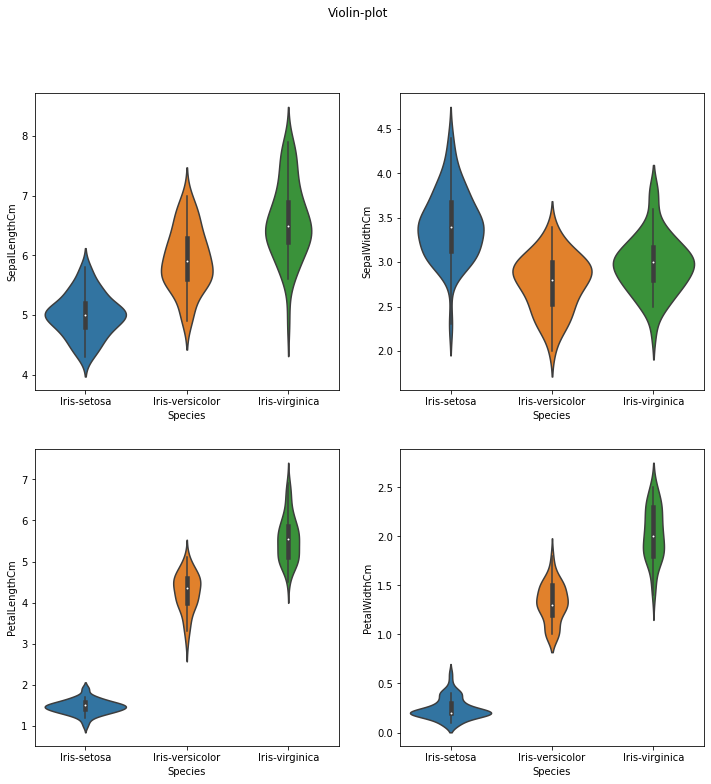

In [5]:
plt.figure(figsize=(12,12))
plt.suptitle("Violin-plot")

plt.subplot(221)
sns.violinplot(x = 'Species', y = 'SepalLengthCm', data = df_iris)

plt.subplot(222)
sns.violinplot(x = 'Species', y = 'SepalWidthCm', data = df_iris)

plt.subplot(223)
sns.violinplot(x = 'Species', y = 'PetalLengthCm', data = df_iris)

plt.subplot(224)
sns.violinplot(x = 'Species', y = 'PetalWidthCm', data = df_iris)


### Scatter plot:
Let us plot all pairwise combinations of the different features on a scatterplot. The diagonal entries plot the distribution functions of the corresponding measurement/feature. It is clear from the different scatter plots that the Species: Iris-setosa is linearly separable from the other two species, that have overlapping points. 

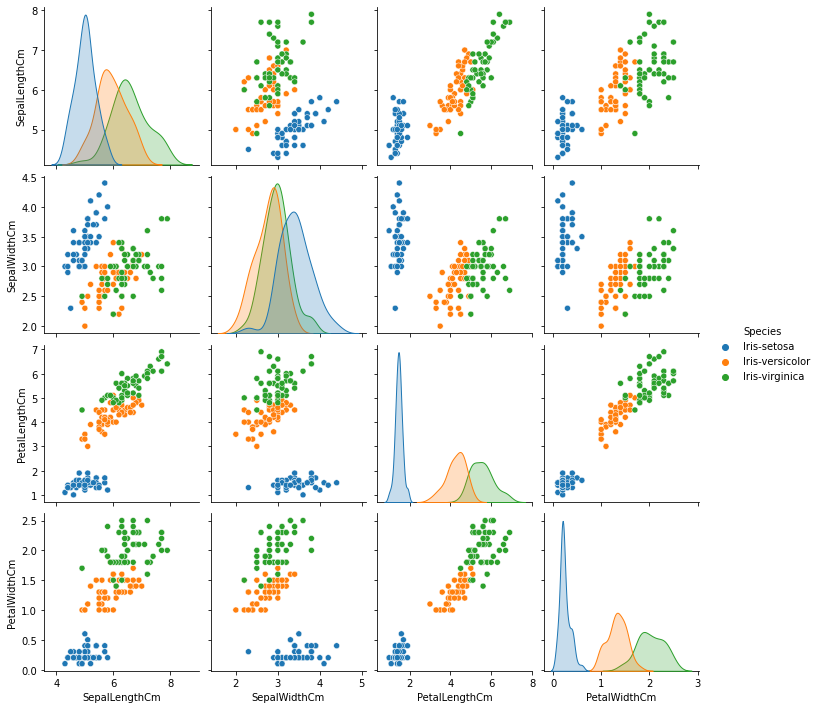

In [ ]:
sns.pairplot(data = df_iris.drop(columns='Id'), hue = 'Species', diag_kind = 'kde')

## Unsupervised Learning : KMeans Clustering Technique
Let us see if we can separate the different species using kMeans clustering technique. In order to determine the number of clusters, we use the elbow method. For number of clusters ranging from 1-10, we find the sum of squared distance (Inertia) within the clusters.

In [ ]:
X = df_iris.drop(columns=['Id','Species']).values
no_clusters = [1,2,3,4,5,6,7,8,9,10]
inertia = np.zeros((10,))
for i in no_clusters:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  inertia[i-1] = kmeans.inertia_


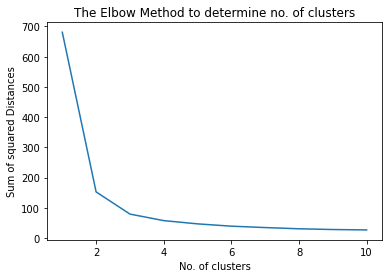

In [ ]:
plt.figure()
plt.plot(no_clusters,inertia)
plt.title("The Elbow Method to determine no. of clusters")
plt.xlabel("No. of clusters")
plt.ylabel("Sum of squared Distances")
plt.show()

The error reduces drastically from 1->2->3. After that the rate decreases. Thus the optimum number of clusters is 3 (as expected).
Now, we fit the model for 3 clusters (labelled as 0, 1 and 2). In general it is a bit non-trivial to determine which of these labels correspnd to which species. One needs to find the accuracy for each possible mapping from the obtained labels -> actual data. The one with the maximum accuracy is the correct mapping between the predicted and known labels. However in this case, since there are just 3 labels, I have manually mapped the labels to the desired species.

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
Y_pred = kmeans.labels_
#print(Y_pred)

In [ ]:
df_iris.loc[df_iris['Species']=='Iris-setosa', 'Slabel'] = 1
df_iris.loc[df_iris['Species']=='Iris-versicolor', 'Slabel'] = 0
df_iris.loc[df_iris['Species']=='Iris-virginica', 'Slabel'] = 2
df_iris['Pred'] = Y_pred

In [ ]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Slabel,Pred
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,1


In [ ]:
df_iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Slabel,Pred
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2.0,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2.0,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2.0,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.0,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2.0,0


Let us scatter plot the data once again using the labels obtained using KMeans.

<Figure size 432x288 with 0 Axes>

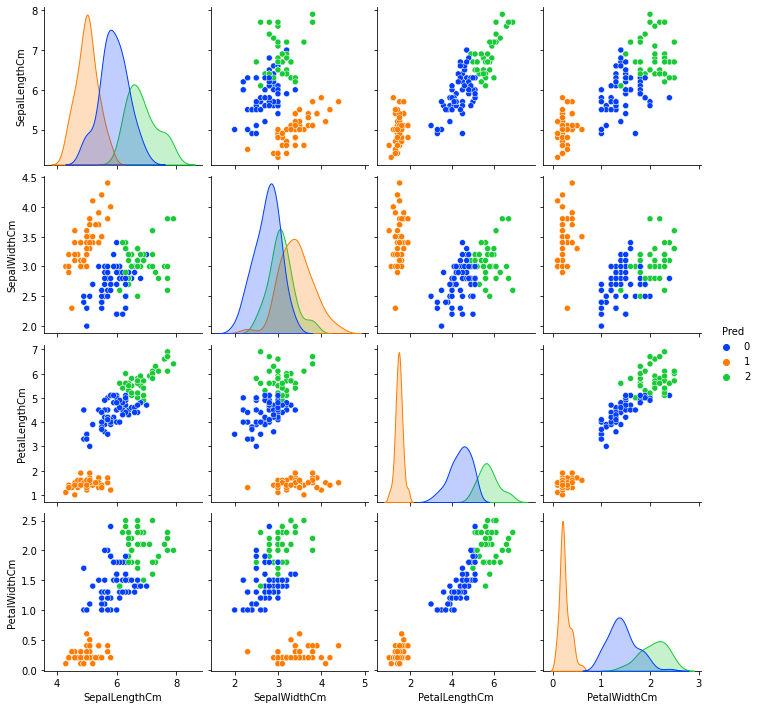

In [ ]:
plt.figure()
sns.color_palette(palette='bright')
sns.pairplot(data = df_iris.drop(columns=['Id','Species','Slabel']), hue = 'Pred', diag_kind = 'kde' ,palette = 'bright')
plt.show()

Let us scatter plot the data for 2 features (Petal length vs Petal width). On the graph on the left, the data are classified using the original species. On the right, they are classified using the labels obtained using KMeans. The co-ordinates of the centroid of the 3 labels are also plotted. The species 'Iris-setosa' is linearly separable and hence cleerly separable from the other two. For '-versicolor' and 'virginica' species, there is a large overlapping region. KMeans reduces this overlapping region to a boundary depending on the distance from the centroids leading to incorrect classifications near the boundary edge.

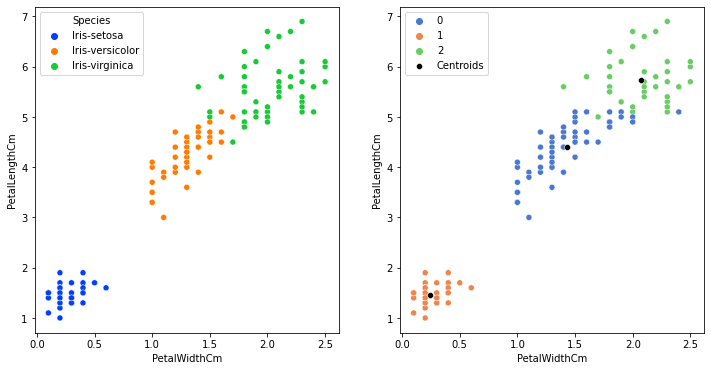

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.scatterplot(x = 'PetalWidthCm', y = "PetalLengthCm", hue = 'Species', data = df_iris, palette = 'bright')

plt.subplot(122)
sns.scatterplot(x = 'PetalWidthCm', y = "PetalLengthCm", hue = 'Pred', data = df_iris, palette = 'muted')
sns.scatterplot(x = kmeans.cluster_centers_[:,3], y = kmeans.cluster_centers_[:,2], markers = '*', color = 'black', label = 'Centroids')

Finally, let us compute the accuracy with which KMeans can capture the classification of the species depending on the measurements. 

In [ ]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
# Measuring Accuracy
print("Accuracy = ", round(sum(df_iris['Pred'] == df_iris['Slabel'])/150, 2))

Accuracy =  0.89
